# K-Means Clustering

### PCA

Principal component analysis (PCA) is used in exploratory data analysis and for making predictive models. It is commonly used for dimensionality reduction by projecting each data point onto only the first few principal components to obtain lower-dimensional data while preserving as much of the data's variation as possible. The first principal component can equivalently be defined as a direction that maximizes the variance of the projected data. The ${\displaystyle i}$th principal component can be taken as a direction orthogonal to the first ${\displaystyle i-1}$ principal components that maximizes the variance of the projected data.

For this project, we will first use PCA to reduce a four dimensional dataset to a two dimensional dataset. Then the two remaining features will be used to implement the k-means clustering algorithm.

### K-Means Clustering
K-means clustering is one of the simplest and popular unsupervised machine learning algorithms. Typically, unsupervised algorithms make inferences from datasets using only input vectors without referring to known, or labelled, outcomes. To process the learning data, the K-means algorithm in data mining starts with a first group of randomly selected centroids, which are used as the beginning points for every cluster, and then performs iterative (repetitive) calculations to optimize the positions of the centroids. It halts creating and optimizing clusters when either the centroids have stabilized (there is no change in their values because the clustering has been successful) or the defined number of iterations has been achieved.

<img src="https://miro.medium.com/max/1400/0*irrlUXS1tmYanvT0.png" width="700" height="400"/>

### The complete k-means clustering algorithm:
1. Randomly choose $k$ distinct feature vectors as the starting centroids, $c_1$, $c_2$, ..., $c_k$.
2. Assign each feature vector to the closest centroid. Clusters are formed accordingly.

$$A_i = \{x: x_i\ is\ assigned\ c_i\}$$

3. Update centroids using $c_i \rightarrow \frac{1}{|A_i|}\sum_{x \in A_i}^{} x$.
4. Repeat step 2 and step 3 until the centroids no longer move.
5. Return $A_1$, $A_2$, ..., $A_k$.

---
# My Implementation on Fruit Dataset

I choose the fruit dataset to implement the algorithm. The dataset contains 4 predictor variables and 3 target variables.

### Predictor variables:
1. mass
2. width
3. height
4. color_score

These four variables will be reduced to two using PCA.

### Target variables:
1. fruit_label (label: 1, 2, 3, 4)
2. fruit_name (label: apple, mandarin, orange, lemon)
3. fruit_subtype

"fruit_label" and "fruit_name" are the same thing, with each number corresponding to a fruit type. "fruit_subtype" is simply the subtype of "fruit_name". However, for k-means clustering, we are interested in predicting the fruit type without knowing the original label.

---
# Libraries Used

The following packages are used to implement this algorithm.

1. [numpy](https://numpy.org/doc/)
2. [pandas](https://pandas.pydata.org/docs/)
3. [matplotlib](https://matplotlib.org/)
4. [sklearn.decomposition](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

---
# Coding Part

Import all necessary libraries.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

Read the fruit dataset.

In [2]:
df = pd.read_table('fruit.txt')

Take a look at the first few rows of the dataset.

In [3]:
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


Set X to be all predictor variables ("mass", "width", "height" and "color_score"). X will further be reduced to two dimensions using PCA. Then take a look at the first several elements in X.

In [4]:
X = df.iloc[:, 3:7].to_numpy()
X[0:10]

array([[192.  ,   8.4 ,   7.3 ,   0.55],
       [180.  ,   8.  ,   6.8 ,   0.59],
       [176.  ,   7.4 ,   7.2 ,   0.6 ],
       [ 86.  ,   6.2 ,   4.7 ,   0.8 ],
       [ 84.  ,   6.  ,   4.6 ,   0.79],
       [ 80.  ,   5.8 ,   4.3 ,   0.77],
       [ 80.  ,   5.9 ,   4.3 ,   0.81],
       [ 76.  ,   5.8 ,   4.  ,   0.81],
       [178.  ,   7.1 ,   7.8 ,   0.92],
       [172.  ,   7.4 ,   7.  ,   0.89]])

---
### PCA

Now apply PCA on X and reduce the dimensions to 2. The two features remaining will be used to implement k-means clustering.

In [5]:
X = PCA(n_components = 2).fit_transform(X)
y = df.fruit_label

Plot the data points with the target variable being "fruit_label". We see that there are four fruit names in total.

Text(0.5, 1.0, 'Feature 1 against Feature 2 After PCA')

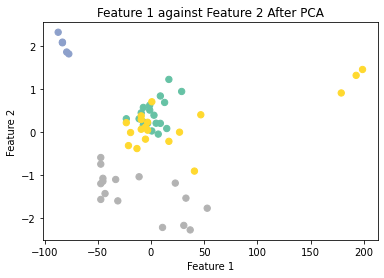

In [6]:
plt.scatter(X[:, 0],
            X[:, 1],
            c = y,
            cmap = plt.cm.Set2,
            s = 40)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Feature 1 against Feature 2 After PCA")

Then, let's mix all the data points by removing the target variable.

Text(0.5, 1.0, 'Feature 1 against Feature 2 After PCA')

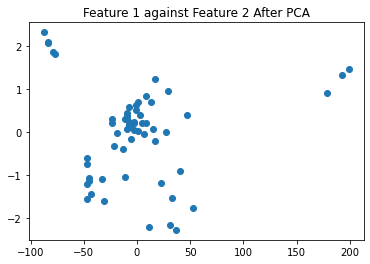

In [7]:
plt.scatter(X[:,0], X[:,1])
plt.title("Feature 1 against Feature 2 After PCA")

### Euclidean distance

Now define a function for euclidean distance.

In [8]:
def distance(v, w):
    return np.sqrt((v - w) @ (v - w))

### Intialize and form clusters

Define a function to initialized 2 centroids. These two centroids are selected randomly. Then define another function to calculate distance between each data point and centroids and assign each feature vector to the closest centroid.

In [9]:
def initialize_centroids(data, k = 2):
    Centroids = []
    for _ in range(k):
        i = np.random.randint(len(X))
        Centroids.append(X[i, :])
    return Centroids
    
def assignment(x, Centroids):
    distances = np.array([distance(x, centroid) for centroid in Centroids])
    return np.argmin(distances)

### Update centroids

Define a function of make-class. Then define another function "new_centroids" to update centroids by generating the mean center for each cluster. Finally define a fit function to decide when to stop the update process.

In [10]:
def make_classes(data, Centroids):
    A = dict()
    for i in range(len(Centroids)):
        A[i] = []
    for x in data:
        A[assignment(x, Centroids)].append(x)
    return A

def new_centroids(data, Centroids):
    new_Centroids = []
    A = make_classes(data, Centroids)
    for i in range(len(Centroids)):
        new_Centroids.append((1/len(A[i]))*sum(A[i]))
    
    return new_Centroids

def fit(data, k = 3, max_iterations = 100, epsilon = 0.01):
    C_old = initialize_centroids(X, k = k)
    C_new = new_centroids(data, C_old)
    centroid_distances = [distance(p[0], p[1]) for p in zip(C_old, C_new)]
    iterations = 0
    while max(centroid_distances) > epsilon and iterations < max_iterations:
        C_old, C_new = C_new, new_centroids(data, C_new)
        centroid_distances = [distance(p[0], p[1]) for p in zip(C_old, C_new)]
        iterations += 1
    return C_new

### Error

Define a function for MSE.

In [11]:
def mse_classes(data, Centroids):
    errors = []
    A_classes = make_classes(data, Centroids)
    for i, centroid in enumerate(Centroids):
        error = sum(.5*(centroid - a) @ (centroid - a) for a in A_classes[i])
        errors.append(error)
    return sum(x for x in errors)

Fit the data with k = 1 through k = 6.

In [12]:
C1 = fit(X, k = 1)
C2 = fit(X, k = 2)
C3 = fit(X, k = 3)
C4 = fit(X, k = 4)
C5 = fit(X, k = 5)
C6 = fit(X, k = 6)
C = [C1, C2, C3, C4, C5, C6]

Compute the MSE for each fitting. The errors decrease significantly from $k = 1$ to $k = 6$.

In [13]:
errors = [mse_classes(X, centroids) for centroids in C]
errors

[87854.38699445588,
 56732.01810894633,
 10344.346797401942,
 6814.227870568008,
 3641.272493808161,
 2763.554781263049]

Now plot the error for each $k$ value.

Text(0, 0.5, 'Error')

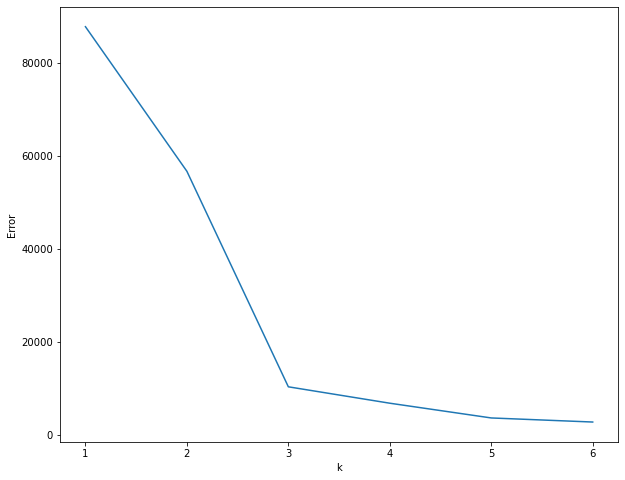

In [14]:
plt.figure(figsize = (10, 8))
plt.plot([i for i in range(1, 7)], errors)
plt.xlabel("k")
plt.ylabel("Error")

From the plot we see that $k = 3$ is a turing point. The errors decrease sharply from 1 to 3 whereas the the errors decrease gently after three, so we choose $k = 3$.

In [15]:
C = fit(X)
print(mse_classes(X, C))

10487.457871209197


In [16]:
A_classes = make_classes(X, C)
[(C[0] - a) for a in A_classes[0]]

[array([11.33254623,  0.31837345]),
 array([-2.66426256, -0.09084318]),
 array([-8.66828368, -0.22753027])]

In [17]:
k = 3
C_old = initialize_centroids(X, k = k)
C_new = new_centroids(X, C_old)
[p for p in zip(C_old, C_new)]

[(array([-9.12022645,  0.29944503]), array([-11.11756973,   0.06657908])),
 (array([-3.1158039 ,  0.21031486]), array([31.46957472, -0.03716707])),
 (array([-33.11881555,  -1.09523233]),
  array([-5.26341237e+01,  2.20768788e-02]))]

### Result

Now, let's see how the classification looks like.

Text(0.5, 1.0, 'Feature 1 against Feature 2 After K-Means Clustering')

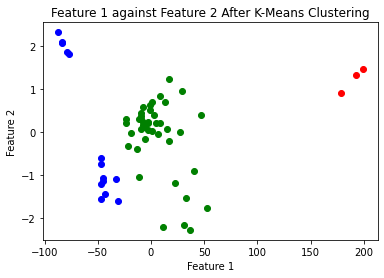

In [18]:
[p for p in zip(C_old, C_new)]
for x in X:
    if assignment(x, C3) == 0:
        plt.scatter(x[0], x[1], color = "blue")
    elif assignment(x, C3) == 1:
        plt.scatter(x[0], x[1], color = "green")
    else:
        plt.scatter(x[0], x[1], color = "red")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Feature 1 against Feature 2 After K-Means Clustering")

Now let's see how the predicted classification compared to the actual classification.

Text(0.5, 1.0, 'Actual Feature 1 against Feature 2')

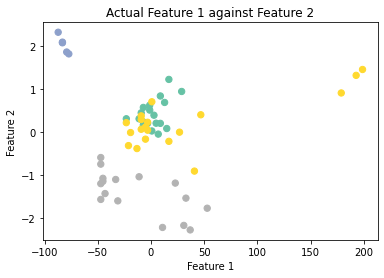

In [19]:
plt.scatter(
    X[:, 0],
    X[:, 1],
    c = y,
    cmap = plt.cm.Set2,
    s = 40)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Actual Feature 1 against Feature 2")

In conclusion, the error plot suggests that we should use $k = 3$, whereas the original dataste has 4 fruit types. From the plot we can see that the prediction is actually not that accurate.

---
# References

Garbade, Michael. Understanding k-means clustering in machine learning. Toward Data Science. https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1

Principal component analysis. Wikipedia. https://en.wikipedia.org/wiki/Principal_component_analysis
